<a href="https://colab.research.google.com/github/shuntarotobari/qtest/blob/main/untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

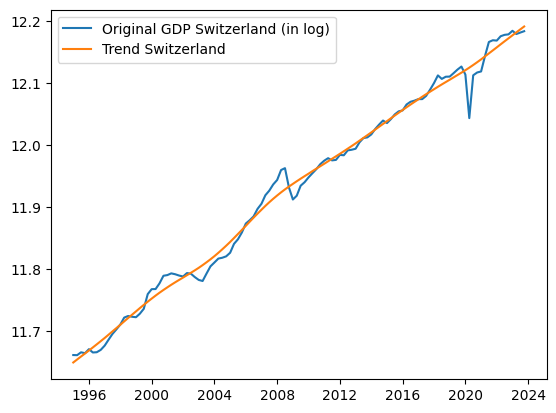

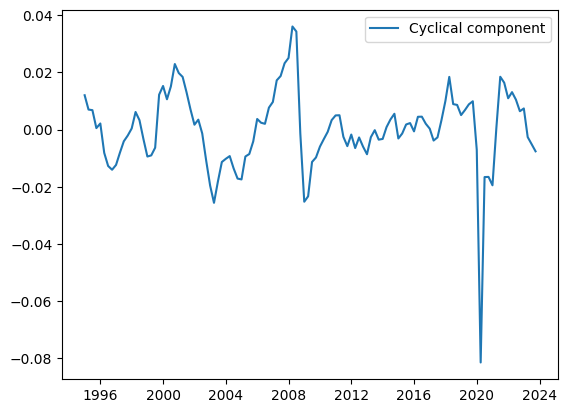

Cycle mean: 2.836351843049262e-13
Cycle standard deviation: 0.013884763837147276


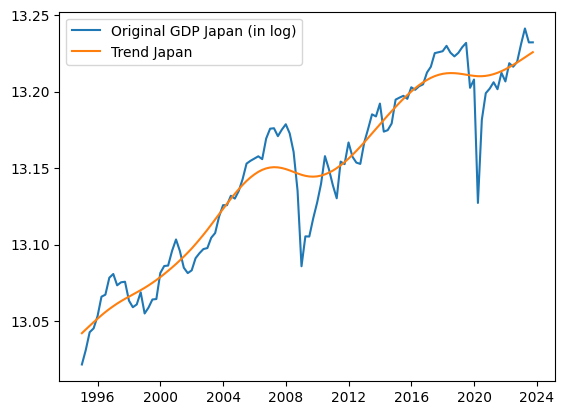

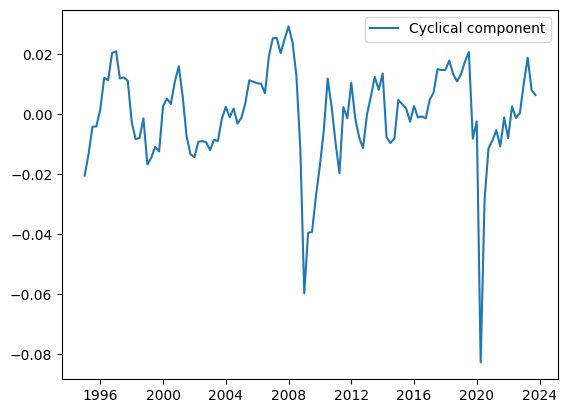

Cycle mean_jp: -2.994233213861474e-13
Cycle standard deviation_jp: 0.016142762592445285


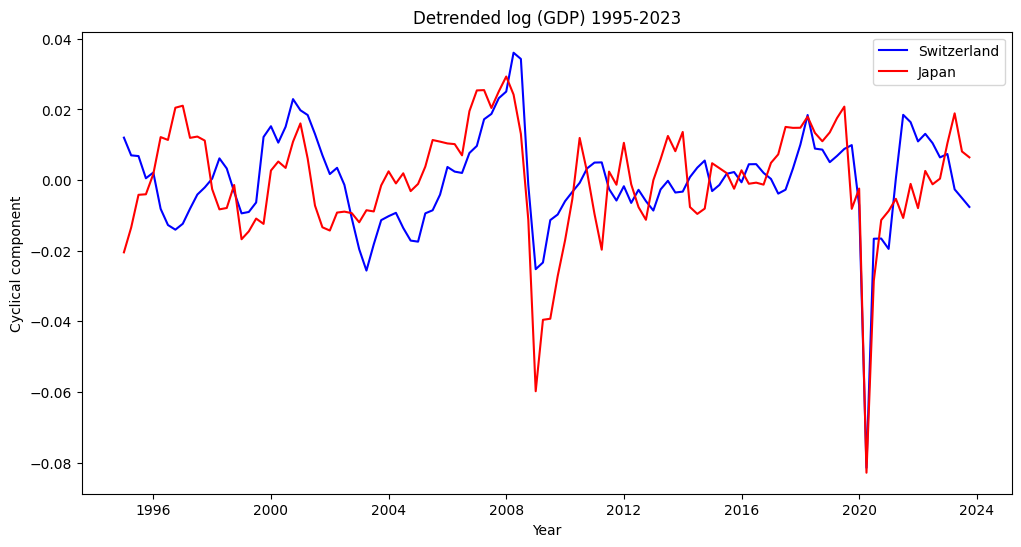

Correlation coefficient between Swiss and Japanese cyclical components: 0.5871071545028717


In [3]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

# set the start and end dates for the data
start_date = '1995-01-01'
end_date = '2023-10-01'

# download the data from FRED using pandas_datareader
gdp = web.DataReader('CLVMNACSAB1GQCH', 'fred', start_date, end_date)
log_gdp = np.log(gdp)

# calculate the quarterly percent change in real GDP
gdp_pct_change = gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_gdp, label="Original GDP Switzerland (in log)")

# Plot the trend component
plt.plot(trend, label="Trend Switzerland")

# Add a legend and show the plot
plt.legend()
plt.show()

# Plot the cycle component
plt.plot(cycle, label="Cyclical component")

# Add a legend and show the plot
plt.legend()
plt.show()

cycle_mean = cycle.mean()
cycle_std = cycle.std()

print("Cycle mean:", cycle_mean)
print("Cycle standard deviation:", cycle_std)

# Japan, download the data from FRED using pandas_datareader
gdp_jp = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)
log_gdp_jp = np.log(gdp_jp)

# calculate the quarterly percent change in real GDP
gdp_pct_change_jp = gdp_jp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle_jp, trend_jp = sm.tsa.filters.hpfilter(log_gdp_jp, lamb=1600)

# Plot the original time series data
plt.plot(log_gdp_jp, label="Original GDP Japan (in log)")

# Plot the trend component
plt.plot(trend_jp, label="Trend Japan")

# Add a legend and show the plot
plt.legend()
plt.show()

# Plot the cycle component
plt.plot(cycle_jp, label="Cyclical component")

# Add a legend and show the plot
plt.legend()
plt.show()

cycle_mean_jp = cycle_jp.mean()
cycle_std_jp = cycle_jp.std()

print("Cycle mean_jp:", cycle_mean_jp)
print("Cycle standard deviation_jp:", cycle_std_jp)

#added two graphs
plt.figure(figsize=(12, 6))
plt.plot(cycle, color='blue', label="Switzerland")
plt.plot(cycle_jp, color='red', label="Japan")
plt.xlabel("Year")
plt.ylabel("Cyclical component")
plt.title("Detrended log (GDP) 1995-2023")
plt.legend()
plt.show()

# 相関係数の計算
corr_coef = cycle.corr(cycle_jp)
print("Correlation coefficient between Swiss and Japanese cyclical components:", corr_coef)